# Phase 1: Loading Data, Cleaning, Transformation, & Exploration

In [1]:
import pandas as pd
import numpy as np

In [2]:
training_file = './data/UNSW_NB15_training-set.csv'
training_data = pd.read_csv(training_file)
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

OK, it looks like we've got 175,341 entries and no null values in any column.
There are 44 columns, but I think there should be a few more, so let's investigate that in a minute.

I might want to think about renaming these columns to something more readable.

In [3]:
training_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


Here we can see that the 4 object type features (proto, service, state, and attack_cat) appear to be Strings.
attack_cat is the class to be learned, might want to convert that to an integer. Label is either 0 or 1, indicating benign or malicious.

Let's see how many classes there are.

In [5]:
print("There are", training_data['attack_cat'].nunique(), "unique values.")
print("Categories:", training_data['attack_cat'].unique())

There are 10 unique values.
Categories: ['Normal' 'Backdoor' 'Analysis' 'Fuzzers' 'Shellcode' 'Reconnaissance'
 'Exploits' 'DoS' 'Worms' 'Generic']


OK, it looks like 9 classes of Malware, plus 'Normal' benign activity.
Maybe we can convert the classes to category type and order them so we can look for correlations with other features.

In [9]:
training_data['attack_cat'] = training_data['attack_cat'].astype('category')
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   id                 175341 non-null  int64   
 1   dur                175341 non-null  float64 
 2   proto              175341 non-null  object  
 3   service            175341 non-null  object  
 4   state              175341 non-null  object  
 5   spkts              175341 non-null  int64   
 6   dpkts              175341 non-null  int64   
 7   sbytes             175341 non-null  int64   
 8   dbytes             175341 non-null  int64   
 9   rate               175341 non-null  float64 
 10  sttl               175341 non-null  int64   
 11  dttl               175341 non-null  int64   
 12  sload              175341 non-null  float64 
 13  dload              175341 non-null  float64 
 14  sloss              175341 non-null  int64   
 15  dloss              175341 non-null

Let's see what those other objects are all about.

In [10]:
print("There are", training_data['proto'].nunique(), "unique values.")
print("Protocols:", training_data['proto'].unique())

There are 133 unique values.
Protocols: ['tcp' 'udp' 'arp' 'ospf' 'icmp' 'igmp' 'rtp' 'ddp' 'ipv6-frag' 'cftp'
 'wsn' 'pvp' 'wb-expak' 'mtp' 'pri-enc' 'sat-mon' 'cphb' 'sun-nd' 'iso-ip'
 'xtp' 'il' 'unas' 'mfe-nsp' '3pc' 'ipv6-route' 'idrp' 'bna' 'swipe'
 'kryptolan' 'cpnx' 'rsvp' 'wb-mon' 'vmtp' 'ib' 'dgp' 'eigrp' 'ax.25'
 'gmtp' 'pnni' 'sep' 'pgm' 'idpr-cmtp' 'zero' 'rvd' 'mobile' 'narp' 'fc'
 'pipe' 'ipcomp' 'ipv6-no' 'sat-expak' 'ipv6-opts' 'snp' 'ipcv'
 'br-sat-mon' 'ttp' 'tcf' 'nsfnet-igp' 'sprite-rpc' 'aes-sp3-d' 'sccopmce'
 'sctp' 'qnx' 'scps' 'etherip' 'aris' 'pim' 'compaq-peer' 'vrrp' 'iatp'
 'stp' 'l2tp' 'srp' 'sm' 'isis' 'smp' 'fire' 'ptp' 'crtp' 'sps'
 'merit-inp' 'idpr' 'skip' 'any' 'larp' 'ipip' 'micp' 'encap' 'ifmp'
 'tp++' 'a/n' 'ipv6' 'i-nlsp' 'ipx-n-ip' 'sdrp' 'tlsp' 'gre' 'mhrp' 'ddx'
 'ippc' 'visa' 'secure-vmtp' 'uti' 'vines' 'crudp' 'iplt' 'ggp' 'ip'
 'ipnip' 'st2' 'argus' 'bbn-rcc' 'egp' 'emcon' 'igp' 'nvp' 'pup' 'xnet'
 'chaos' 'mux' 'dcn' 'hmp' 'prm' 'trunk-1' 

In [11]:
print("There are", training_data['service'].nunique(), "unique values.")
print("Services:", training_data['service'].unique())

There are 13 unique values.
Services: ['-' 'ftp' 'smtp' 'snmp' 'http' 'ftp-data' 'dns' 'ssh' 'radius' 'pop3'
 'dhcp' 'ssl' 'irc']


In [12]:
print("There are", training_data['state'].nunique(), "unique values.")
print("State:", training_data['state'].unique())

There are 9 unique values.
State: ['FIN' 'INT' 'CON' 'ECO' 'REQ' 'RST' 'PAR' 'URN' 'no']


This gives us an idea of what kind of network traffic data we're working with.

Let's see the distribution of classes.

Matplotlib is building the font cache; this may take a moment.


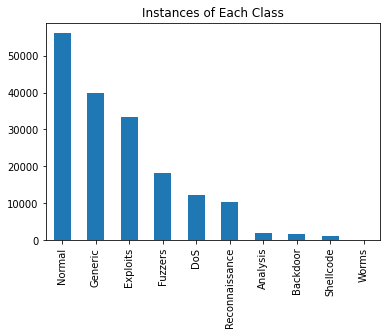

In [13]:
_ = training_data['attack_cat'].value_counts().plot(kind='bar', title='Instances of Each Class')

In [14]:
training_data['attack_cat'].value_counts()

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

Is there a danger of classification bias with this breakdown (only 130/175,341 instances are worms)?
What could we do to better balance without throwing away most of the data.
On the other hand this data set is probably representative of the percentages of malware in the wild.

We should calculate data correlations and plot a scatter matrix.

We can look at statistics for certain features.

In [15]:
training_data['dur'].describe()

count    175341.000000
mean          1.359389
std           6.480249
min           0.000000
25%           0.000008
50%           0.001582
75%           0.668069
max          59.999989
Name: dur, dtype: float64